LAB 2, 12.03.2025

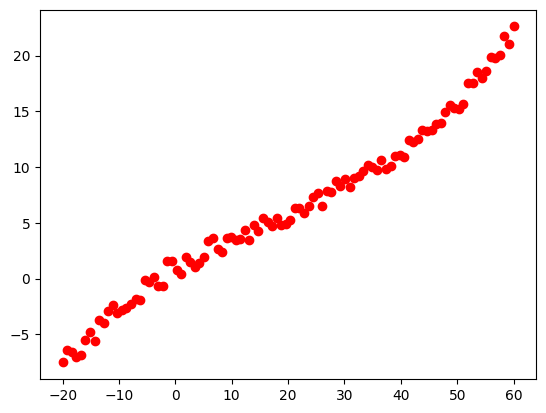

In [368]:
#implomentujemy potrzebne biblioteki
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)
#wczytujemy dane z pliku csv do tablicy numpy

plt.plot(data[:,0], data[:,1], 'ro')

#przypisanie danych do zmiennych
x_1 = data[:, 0]
y_1 = data[:, 1]



### *REGRESJA LINIOWA JEDNEJ ZMIENNEJ*

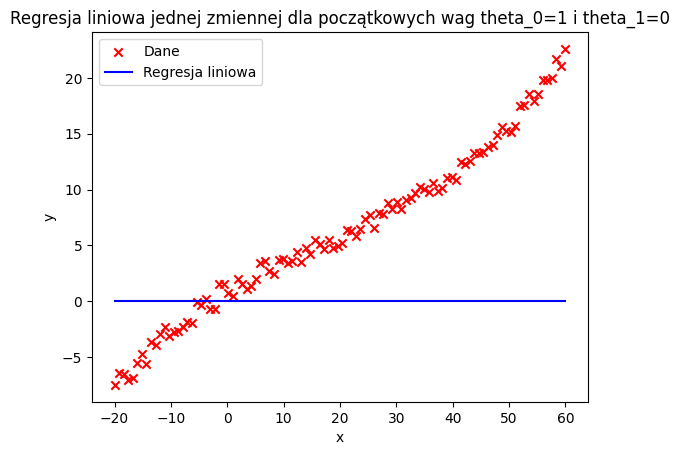

In [369]:

def h_fun(x, theta_0, theta_1):
    return theta_0 + theta_1 * x
#zwraca funkcję liniową, która jest naszym modelem
#regresji liniowej

def calculate_cost(x, y, theta_0, theta_1):
    total_cost = 0
    for i in range(len(x)):
            #dla każdego punktu danych obliczamy różnicę między wartością rzeczywistą
            #a wartością przewidywaną przez model, liczymy kwadrat tej różnicy i sumujemy
        total_cost += (h_fun(x[i], theta_0, theta_1) - y[i]) ** 2
    return (1 / (2 * len(x))) * total_cost
#funkcja kalkulująca jak model różni się od danych

eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # początkowe wartości parametrów modelu
theta_1 = 0

predictions = [h_fun(x_1[i], theta_0, theta_1) for i in range(len(x_1))]
plt.scatter(x_1, y_1, color='red', marker='x', label='Dane')
plt.plot(x_1, [h_fun(xi, theta_0, theta_0) for xi in x_1], color='blue', label='Regresja liniowa')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja liniowa jednej zmiennej dla początkowych wag theta_0=1 i theta_1=0')  # początkowe wartości parametrów modelu
plt.legend()
plt.show()





<!-- # ZAD 2 
### *REGRESJA LINIOWA WIELU ZMIENNYCH* -->

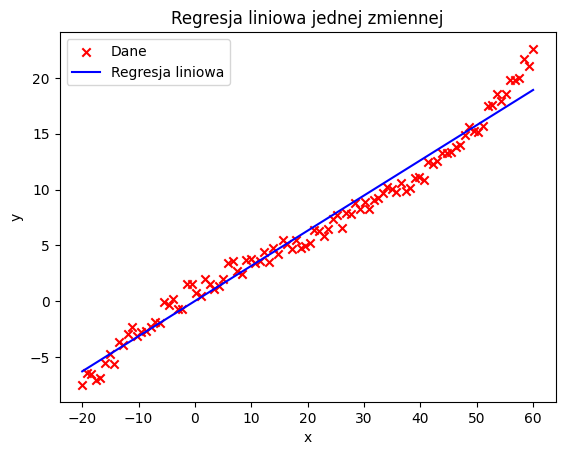

Optymalne theta_0: 0.006488
Optymalne theta_1: 0.315384
Końcowa wartość funkcji kosztu: 0.6392


In [370]:

previous_cost = float('inf')

while True:
    predictions = [h_fun(x_1[i], theta_0, theta_1) for i in range(len(x_1))]
    
    # Oblicz wartość pochodnej cząstkowej funkcji kosztu dla parametru theta_0 i theta_1
    gradient_theta_0 = 0
    gradient_theta_1 = 0
    for i in range(len(x_1)):
        gradient_theta_0 += predictions[i] - y_1[i]
        gradient_theta_1 += (predictions[i] - y_1[i]) * x_1[i]
    
    gradient_theta_0 = gradient_theta_0/len(x_1)
    gradient_theta_1 = gradient_theta_1/len(x_1)
    
    #- zaktualizuj wagę modelu regresji liniowej theta_0 (i 1) (theta_0 = theta_0 - alpha * gradient_theta_0)

    theta_0 = theta_0 - alpha * gradient_theta_0
    theta_1 = theta_1 - alpha * gradient_theta_1
    
    # Oblicz wartość f. kosztu dla zaktualizowanych wag
    current_cost = calculate_cost(x_1, y_1, theta_0, theta_1)
    
    # Wykonuj dopóki różnica poprzedniej wartości funkcji kosztu i obecnej jest większa niż eps
    if abs(previous_cost - current_cost) < eps:
        break
    previous_cost = current_cost

# Wykres regresji
plt.scatter(x_1, y_1, color='red', marker='x', label='Dane')
#wyświetlamy wykres z najlepszymi wartościami theta_0 i theta_1
plt.plot(x_1, [h_fun(xi, theta_0, theta_1) for xi in x_1], color='blue', label='Regresja liniowa')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja liniowa jednej zmiennej')
plt.legend()
plt.show()

# Wyświetlenie wyników
print(f'Optymalne theta_0: {theta_0:.6f}')
print(f'Optymalne theta_1: {theta_1:.6f}')


print(f'Końcowa wartość funkcji kosztu: {current_cost:.4f}')

### *REGRESJA LINIOWA WIELU ZMIENNYCH*

W pierwszej kolejności zadanie zrealizujemy na danych z zadania poprzedniego aby mieć możliwość weryfikacji poprawności implementacji.

In [371]:
#Dostosowujemy funkcje 
def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    # Obliczanie przewidywanych wartości na podstawie wzoru regresji liniowej
    # Mnożenie macierzy theta.T (1x(n+1)) i X (n+1)x(m) daje wynik o wymiarach 1xm
    #transponujemy macierz theta i  wykonujemy mnożenie macierzowe
    return theta.T @ X  # Mnożenie macierzowe

def calculate_cost(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = y.shape[1]
    h = h_fun(X, theta)
    # Obliczanie funkcji kosztu na podstawie wzoru MSE: (1/2m) * sum((h - y)^2)
    # m = y.shape[1] jest używane, aby poprawnie określić liczbę próbek w przypadku pracy z macierzami wielowymiarowymi.
    return (1 / (2 * m)) * np.sum((h - y) ** 2)



# tworzymy zmienną X o wymiarach n+1xm, gdzie n to liczba cech. Wiersz 0 takiej macierzy ma
# być wypełniony jedynkami (taki zabieg będzie pomocny przy obliczaniu gradientu).
x_1 = np.vstack([np.ones(x_1.shape), x_1])
# y powinien być macierzą o wymiarach 1xm, gdzie m to liczba przykładów
y_1.shape = [1, -1]


# W tym przypadku theta to wektor o wymiarach (n+1, 1), gdzie n to liczba cech, a nie skalarna wartość (jak wcześniej).
theta = np.array([[0], [0]])

print("before", y_1.shape)
print("before", x_1.shape)
print(h_fun(x_1, theta).shape)

#y.shape = (1, 100)
#X.shape = (2, 100)
#h.shape = (1, 100)





before (1, 100)
before (2, 100)
(1, 100)


In [372]:
alpha = 0.001  # Learning rate
eps = 1e-5  # Kryterium stopu
previous_cost = float('inf')
m = y_1.shape[1]

while True:
    # Oblicz wartość funkcji kosztu
    h_y_diff = (h_fun(x_1, theta) - y_1)
    # Oblicz gradient funkcji kosztu
    gradient = h_y_diff @ x_1.T
    # Aktualizuj wartość theta
    theta = theta - alpha * gradient.T / m
    
    current_cost = calculate_cost(x_1, y_1, theta)
    
    if abs(previous_cost - current_cost) < eps:
        break
    previous_cost = current_cost

print(f'Optymalne theta: {theta.flatten()}')
print(f'Końcowa wartość funkcji kosztu: {current_cost:.6f}')

Optymalne theta: [0.00648763 0.31538416]
Końcowa wartość funkcji kosztu: 0.639174


Proszę dokonać optymalizacji modelu regresji liniowej wielu zmiennych dla danych housing.txt
Dane przedstawiają wartości nieruchomości w zależności od liczby pokoi i całkowitej powierzchni.


In [373]:


with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)
    y = data2[:, 2]
    y.shape = [1, y.shape[0]]
    X = data2[:, 0:2]
    X =np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T

#Ze względu na różne zakresy poszczególnych cech 
# i wartości, skalujemy wczytane dane.
y_scale = y.max()
y = y / y_scale
X_scale = X.max(axis=1, keepdims=True)  # (3,1)
X = X / X_scale

m = y.shape[1]  # Liczba próbek
theta=np.array([[0], [0], [0]])
#zmienna theta to wektor o wymiarach (n+1, 1), 
# gdzie n to liczba cech
alpha = 0.001  # Współczynnik uczenia
eps = 1e-5  # Kryterium stopu
previous_cost = float('inf')

# Gradient Descent
while True:


    h_y_diff = (h_fun(X, theta) - y)
    #liczymy różnice między wartością przewidywaną a wartością rzeczywistą
    gradient = h_y_diff @ X.T
    # Oblicz gradient funkcji kosztu
    theta = theta - alpha * gradient.T / m
    # # Aktualizuj wartość theta

    current_cost = calculate_cost(X, y, theta)
    # Oblicz wartość funkcji kosztu

    if abs(previous_cost - current_cost) < eps:
        break
    previous_cost = current_cost

# Wyniki
print(f'Optymalne theta: {theta.flatten()}')
print(f'Końcowa wartość funkcji kosztu: {current_cost:.6f}')

# Predykcja dla nowej nieruchomości
example = np.array([[1], [1300], [4]])  # Wartości wejściowe
example_scaled = example / X_scale  # Skalowanie
h_example = theta.T @ example_scaled * y_scale  # Predykcja

print(f'Koszt nieruchomości o pow. {example[1][0]} m² z {example[2][0]} pokojami: {h_example[0][0]:.2f}')


Optymalne theta: [0.24937951 0.13701888 0.16736231]
Końcowa wartość funkcji kosztu: 0.013387
Koszt nieruchomości o pow. 1300 m² z 4 pokojami: 296090.64


### *Regresja wielomianowa
*


Rozmiar y: (1, 100)
Rozmiar X: (4, 100)
Rozmiar theta: (4, 1)
rozmiar funkcji h (1, 100)
Optymalne theta: [ 0.02528658  0.77921902 -0.49718083  0.65075679]
Końcowa wartość funkcji kosztu: 0.000327


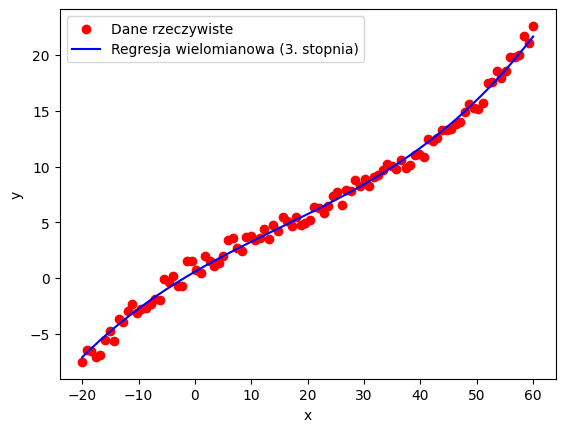

In [374]:


x_1 = data[:, 0]
y_1 = data[:, 1]

#aby przygotowac wielomian trzeciego stopnia 
#wystarczy, że przygotujemy odpowiednio macierz X
#gdzie kolejne wiersze będą kombinacjami nieliniowymi oryginalnej cechy.
X = np.vstack([np.ones(x_1.shape), x_1, x_1**2, x_1**3])


#Przez fakt, że podniesienie do kwadratu i 
# sześcianu oryginalnych wartości mocno rozszerza
# nam zakres wejścia, skalujemy dane.
X_scale = X.max(axis=1, keepdims=True)
X_scale.shape = [-1, 1]
X = X / X_scale

y_1.shape = [1, -1]
y_scale = y_1.max()
y_1 = y_1 / y_scale





theta = np.zeros((4, 1))  # Theta dla wielomianu stopnia 3 (4 współczynniki)
alpha = 1e-3  # Współczynnik uczenia
eps = 1e-10  # Kryterium stopu
previous_cost = float('inf')

print("Rozmiar y:", y_1.shape)  # (1, m)
print("Rozmiar X:", X.shape)    # (4, m)
print("Rozmiar theta:", theta.shape)  # (4, 1)
print("rozmiar funkcji h", h_fun(X, theta).shape)  # (1, m)
#y.shape = (1, 100)
#X.shape = (4, 100)
#theta.shape = (4, 1)
#h.shape = (1, 100)

# Gradient Descent
while True:
    #liczymy różnice między wartością przewidywaną a wartością rzeczywistą
    h_y_diff = h_fun(X, theta) - y_1
    # Oblicz gradient funkcji kosztu
    gradient = (h_y_diff @ X.T) / y_1.shape[1]
    # # Aktualizuj wartość theta
    theta = theta - alpha * gradient.T

    current_cost = calculate_cost(X, y_1, theta)
    if abs(previous_cost - current_cost) < eps:
        break
    previous_cost = current_cost

# Wyniki
print(f'Optymalne theta: {theta.flatten()}')
print(f'Końcowa wartość funkcji kosztu: {current_cost:.6f}')

# **Rysowanie wykresu dopasowania**
plt.scatter(x_1, y_1 * y_scale, color='red', label="Dane rzeczywiste")
x_range = np.linspace(x_1.min(), x_1.max(), 100)
X_test = np.vstack([np.ones(x_range.shape), x_range, x_range**2, x_range**3]) / X_scale
y_pred = h_fun(X_test, theta) * y_scale
plt.plot(x_range, y_pred.flatten(), color='blue', label="Regresja wielomianowa (3. stopnia)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
